In [24]:
#import magic and libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [29]:
#import data set and clean up
charity = pd.read_csv('Charity3.csv')
charity = pd.concat([charity, dummies], axis=1)
charity = charity.dropna(subset=['avg coll age'])
#charity['age'] = charity['age'].convert_objects(convert_numeric=True)
#charity = charity.dropna(subset=['age'])
charity['postcode'] = charity['postcode'].astype(str)
charity.head()

,postcode,no of collectors,avg streets,new coll ratio,total collected,total donated,total received,avg collected,avg donated,avg received,avg coll age,no weekends,prof ratio,no prof coll,Acq,Renewals
0,801.0,2,4.00,0.50,618.55,0.00,618.55,309.28,0.00,309.28,68.50,4,1.00,2,0,1
1,804.0,3,2.67,0.00,356.60,50.00,406.60,118.87,16.67,135.53,68.50,4,1.00,3,1,0
2,810.0,38,2.08,0.66,3782.75,349.25,4132.00,99.55,9.19,108.74,58.45,4,0.55,38,0,1
4,812.0,21,2.33,0.76,1759.10,200.00,1959.10,83.77,9.52,93.29,64.18,4,0.62,21,0,1
7,820.0,17,2.65,0.82,2360.65,100.00,2460.65,138.86,5.88,144.74,67.56,4,0.65,17,1,0


In [30]:
#have a look at the data
charity.describe(include='all')

,postcode,no of collectors,avg streets,new coll ratio,total collected,total donated,total received,avg collected,avg donated,avg received,avg coll age,no weekends,prof ratio,no prof coll,Acq,Renewals
count,1772,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000
unique,1772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,25.353837,2.795023,0.622184,1946.306738,103.047427,2049.354165,78.057472,5.040344,83.097619,62.848696,3.506208,0.420231,25.353837,0.637698,0.362302
std,NaN,29.879460,1.924723,0.213868,2321.875945,150.347212,2421.508445,34.067063,10.460497,34.506490,7.312986,0.787010,0.227475,29.879460,0.480801,0.480801
min,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,10.000000,19.000000,2.000000,0.000000,1.000000,0.000000,0.000000
25%,NaN,5.000000,1.330000,0.500000,399.750000,0.000000,421.912500,59.507500,0.000000,63.315000,59.120000,3.000000,0.290000,5.000000,0.000000,0.000000
50%,NaN,15.000000,2.325000,0.630000,1151.005000,50.000000,1196.225000,72.505000,2.430000,76.865000,63.275000,4.000000,0.400000,15.000000,1.000000,0.000000
75%,NaN,35.000000,3.190000,0.740000,2625.487500,141.125000,2786.737500,88.535000,5.560000,95.477500,67.260000,4.000000,0.530000,35.000000,1.000000,1.000000


In [31]:
#look for any correlations
charity.corr()

,no of collectors,avg streets,new coll ratio,total collected,total donated,total received,avg collected,avg donated,avg received,avg coll age,no weekends,prof ratio,no prof coll,Acq,Renewals
no of collectors,1.000000,0.027035,-0.039131,0.963051,0.617661,0.961776,-0.032186,-0.079199,-0.055784,-0.036605,-0.104726,-0.038101,1.000000,0.052989,-0.052989
avg streets,0.027035,1.000000,-0.082408,-0.000337,-0.020313,-0.001584,-0.030130,-0.010782,-0.033012,0.017953,0.026714,-0.007442,0.027035,0.011218,-0.011218
new coll ratio,-0.039131,-0.082408,1.000000,-0.060115,-0.026400,-0.059281,-0.154042,0.028411,-0.143469,-0.108275,-0.046828,-0.175318,-0.039131,0.006546,-0.006546
total collected,0.963051,-0.000337,-0.060115,1.000000,0.644524,0.998873,0.108040,-0.068061,0.086033,-0.000610,-0.031993,0.078778,0.963051,0.043867,-0.043867
total donated,0.617661,-0.020313,-0.026400,0.644524,1.000000,0.680094,0.022263,0.351917,0.128661,0.021845,0.069056,0.099470,0.617661,0.065841,-0.065841
total received,0.961776,-0.001584,-0.059281,0.998873,0.680094,1.000000,0.104977,-0.043411,0.090482,0.000772,-0.026389,0.081713,0.961776,0.046150,-0.046150
avg collected,-0.032186,-0.030130,-0.154042,0.108040,0.022263,0.104977,1.000000,-0.111246,0.953541,0.183274,0.146941,0.728653,-0.032186,-0.049696,0.049696
avg donated,-0.079199,-0.010782,0.028411,-0.068061,0.351917,-0.043411,-0.111246,1.000000,0.193315,0.102867,0.077145,0.110716,-0.079199,0.061445,-0.061445
avg received,-0.055784,-0.033012,-0.143469,0.086033,0.128661,0.090482,0.953541,0.193315,1.000000,0.212124,0.168460,0.752938,-0.055784,-0.030433,0.030433
avg coll age,-0.036605,0.017953,-0.108275,-0.000610,0.021845,0.000772,0.183274,0.102867,0.212124,1.000000,0.204470,0.193552,-0.036605,0.041152,-0.041152


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a3a77d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x130f18050>]], dtype=object)

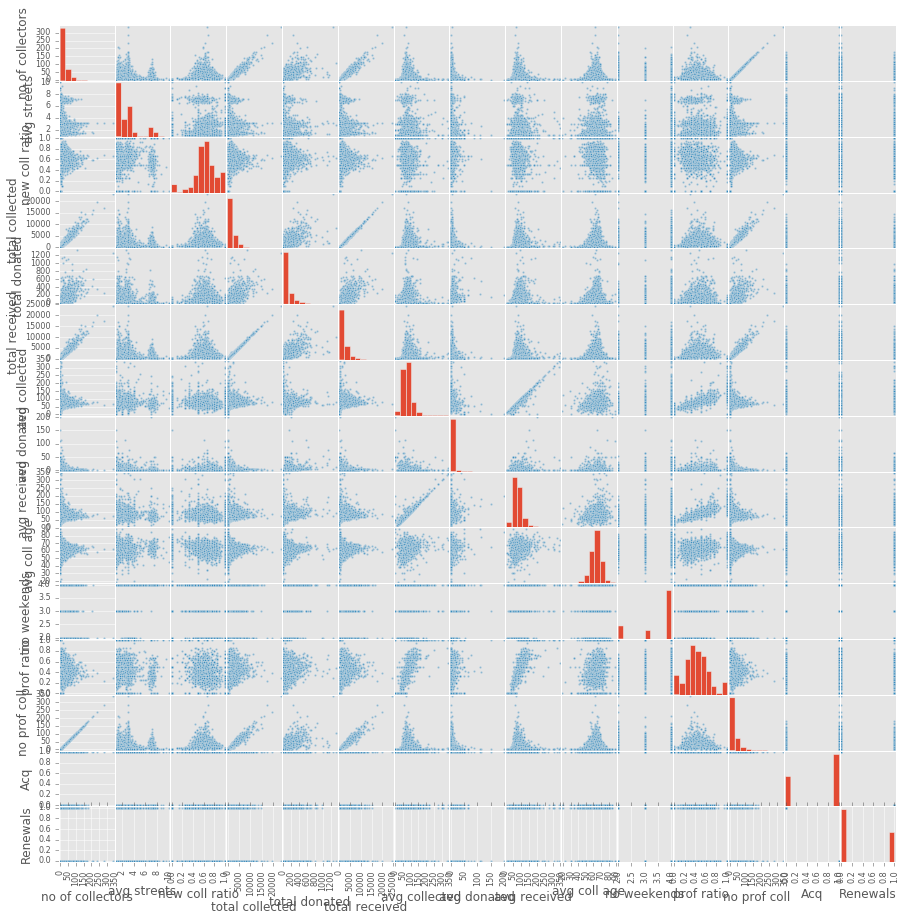

In [32]:
#create scatter matrix
pd.scatter_matrix(charity, figsize=(15,15))

In [10]:
# create a fitted model in one line
import statsmodels.formula.api as smf
lm = smf.ols(formula='total_received ~ age + num_streets', data=charity).fit()

# print the coefficients
lm.params

Intercept      24.599394
age             0.943302
num_streets    -0.633013
dtype: float64

In [11]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         total_received   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     491.0
Date:                Sun, 22 May 2016   Prob (F-statistic):          4.08e-210
Time:                        11:09:36   Log-Likelihood:            -1.5059e+05
No. Observations:               26597   AIC:                         3.012e+05
Df Residuals:                   26594   BIC:                         3.012e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      24.5994      2.005     12.271      0.000        20.670    28.529
age             0.9433      0.030     31.087      0.000         0.884     1.003
num_streets    -0.6330      0.167     -3.780      0.000        -0.961    -0.305
==============================================================================
Omnibus:                    28073.110   Durbin-Watson:                   1.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5391253.213
Skew:                           4.946   Prob(JB):                         0.00
Kurtosis:                      72.043   Cond. No.                         301.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Let's try just the total collected
# create a fitted model in one line
lm = smf.ols(formula='total_received ~ collection_amount ', data=charity).fit()

# print the coefficients
lm.params

Intercept            6.654197
collection_amount    0.962598
dtype: float64

In [13]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         total_received   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 3.619e+05
Date:                Sun, 22 May 2016   Prob (F-statistic):               0.00
Time:                        11:09:40   Log-Likelihood:            -1.1541e+05
No. Observations:               26597   AIC:                         2.308e+05
Df Residuals:                   26595   BIC:                         2.308e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             6.6542      0.169     39.417      0.000         6.323     6.985
collection_amount     0.9626      0.002    601.540      0.000         0.959     0.966
==============================================================================
Omnibus:                    50198.576   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        225855372.228
Skew:                          14.109   Prob(JB):                         0.00
Kurtosis:                     453.562   Cond. No.                         157.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

feature_cols = ['age', 'num_streets', 'weekends', 'Acq', 'postcode']
X = charity[feature_cols]
y = charity.total_received
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_class = linreg.predict(X_test)
from sklearn import metrics
print metrics.r2_score(y_test, y_pred_class)


0.0637056411947


In [15]:
#add in ATO data and see if I can improve my model
tax = pd.read_csv('2014tax2.csv')
tax['postcode'] = tax['postcode'].astype(str)
charity_new = pd.merge(charity, tax, on='postcode')
charity_new.head()
print charity_new.columns



Index([u'postcode', u'num_streets', u'collection_amount', u'donation_amount',
       u'total_received', u'age', u'weekends', u'profitable', u'Acq',
       u'tax individuals', u'avg tax income', u'avg gross tax paid',
       u'avg net tax paid', u'avg salary', u'no pensions', u'avg pension',
       u'avg income', u'no donations', u'value donations',
       u'avg donation value'],
      dtype='object')


In [16]:
feature_cols = ['age', 'Acq', 'postcode', 'avg donation value', 'no donations', 'avg tax income']
X = charity_new[feature_cols]
y = charity_new.total_received
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_class = linreg.predict(X_test)
from sklearn import metrics
print metrics.r2_score(y_test, y_pred_class)

0.0993599548147


In [31]:
lm = sm.OLS(y, X).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121e4d490>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x133a9f310>]], dtype=object)

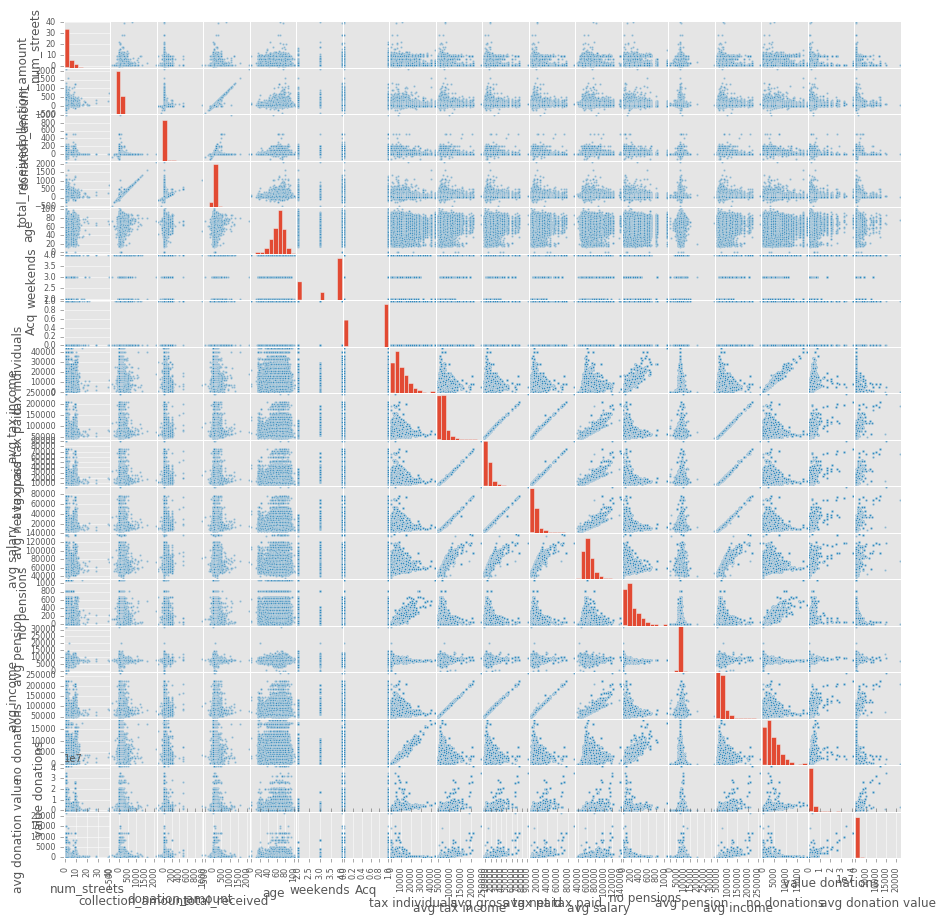

In [14]:
#create scatter matrix
pd.scatter_matrix(charity_new, figsize=(15,15))

In [32]:
#X = charity_new.filter(regex="[^total_received|^collection_amount|^donation_amount]")
X = charity_new.filter(regex="[^total_received|^collection_amount]")
y = charity_new.total_received
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_class = linreg.predict(X_test)
from sklearn import metrics
print metrics.r2_score(y_test, y_pred_class)

0.102058468842


('Coefficients: \n', array([ -4.70462402e-03,   3.66004264e-01,   8.08894986e-01,
         3.95121523e+00,  -2.12703638e+01,   9.42851949e-04,
         9.03273620e-03,  -5.56748393e-03,  -4.49999525e-03,
        -5.86257208e-04,  -1.41268416e-02,  -2.29381599e-04,
        -3.97364360e-03,  -2.00821215e-03,   1.09501961e-06,
        -5.75516007e-04]))
Residual sum of squares: 4068.82
Variance score: 0.10


ValueError: x and y must be the same size

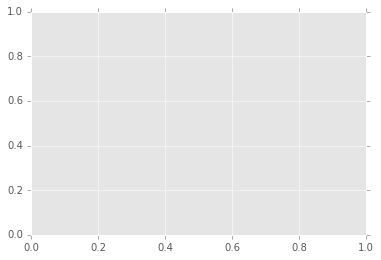

In [33]:
from sklearn import linear_model

# The coefficients
print('Coefficients: \n', linreg.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((linreg.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % linreg.score(X_test, y_test))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, linreg.predict(X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [22]:
# evaluate the model using 10-fold cross-validation
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(LinearRegression(), X, y, scoring='r2', cv=100)
print scores
print scores.mean()

[ -1.52430881e+02   1.25366304e-02  -5.35846716e-02   4.35836555e-02
   4.64264721e-02   4.70729673e-02   7.01510068e-02   5.29410585e-02
  -3.02581986e-03  -2.23628786e-02   3.14495207e-02   5.90377584e-02
   6.16471257e-03   2.43050201e-02   8.36398876e-02   4.19411282e-02
   3.77130264e-02   7.03696822e-02   2.58376399e-04   6.90912247e-02
   1.20551271e-02  -1.75696180e-01   4.65565877e-02   3.35169172e-02
   1.03741915e-01   1.14689374e-02   3.35360990e-02  -1.24464410e-02
   2.83316940e-02   1.33533101e-01  -1.00340064e-02  -1.43240119e-01
   6.06060629e-02   6.05516529e-02   4.77595400e-03   7.31414261e-02
   3.92053157e-02  -1.34698881e-01   1.06965012e-02   1.30655231e-01
   4.11967919e-02   9.89075258e-02   4.87166791e-02   7.98284548e-02
   5.83762708e-02  -1.56427017e-03   7.95271332e-02   5.95659172e-02
  -3.63310959e-04  -3.28601064e-01  -4.46557311e-02  -2.31390430e-02
   6.65657072e-02   2.51030663e-02   2.47413598e-02  -4.24742799e-01
   3.58576539e-02   1.14961132e-02

In [25]:
#this is really bad - linear regression not really doing it for me..

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [28]:
# evaluate the model using 10-fold cross-validation
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(LinearRegression(), X, y, scoring='mean_squared_error', cv=100)
print scores
print scores.mean()
print 'RMSE =', np.sqrt(metrics.mean_squared_error(y_test, y_pred_class))


[ -1.99426202e+06  -1.62448087e+04  -1.09630466e+04  -4.03126158e+03
  -1.09494324e+04  -5.46155705e+03  -6.40171768e+03  -6.63045800e+03
  -6.18150222e+03  -4.06911477e+03  -4.85768810e+03  -5.15206115e+03
  -3.58493163e+03  -6.30690510e+03  -4.60796752e+03  -4.48736090e+03
  -3.06706604e+03  -4.23093368e+03  -3.17497885e+03  -8.23844400e+03
  -7.07533700e+03  -5.38797609e+03  -9.31574719e+03  -3.69104794e+03
  -4.69903534e+03  -5.35517676e+03  -3.95461106e+03  -6.04923512e+03
  -3.24678636e+03  -5.07619827e+03  -4.22392871e+03  -3.87726599e+03
  -6.14309785e+03  -2.91110734e+03  -4.48857167e+03  -3.86216097e+03
  -7.51208375e+03  -5.42968104e+03  -3.18334743e+03  -3.89647319e+03
  -2.52984155e+03  -4.03178724e+03  -2.86928611e+03  -3.54866185e+03
  -4.52937464e+03  -5.63714028e+03  -2.09983825e+03  -3.18371900e+03
  -4.03697774e+03  -4.04469511e+03  -3.58320257e+03  -1.69550806e+03
  -1.63799214e+03  -5.79536323e+03  -3.79688026e+03  -3.86208448e+03
  -6.31719423e+03  -1.90530124e+03

In [ ]:
#plot the clusters
colors = np.array(['#FF0054','#FBD039','#23C2BC','#23C2BC'])
plt.figure()
charity.plot(kind='scatter', x='age', y='total_received',c=colors[y_kmeans])

In [ ]:
#Try Decision Trees
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [ ]:
#split data up for training
charity = d['Survived'].copy(deep=True)
del d['Survived']

d

In [ ]:
y = charity.array('total_received')
print y

In [ ]:
X = charity
#X.drop('total_received', axis=1, inplace=True)
#X.drop('collection_amount', axis=1, inplace=True)
#X.drop('donation_amount', axis=1, inplace=True)
#y = X.total_received()
X.describe(include='all')

In [ ]:
#PCA Analysis
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

pca = decomposition.PCA(n_components=1)
X_r = pca.fit_transform(X)

y = charity.total_received()

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA(2 components) of IRIS dataset')

In [ ]:
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
# generate some data to play with
#X, y = samples_generator.make_classification(
# n_informative=5, n_redundant=0, random_state=42)
# ANOVA SVM-C
#anova_filter = SelectKBest(f_regression, k=5)
#clf = svm.SVC(kernel='linear')
#anova_svm = Pipeline([('anova', anova_filter), ('svc', clf)])
>>> # You can set the parameters using the names issued
>>> # For instance, fit using a k of 10 in the SelectKBest
>>> # and a parameter 'C' of the svm
>>> anova_svm.set_params(anova__k=10, svc__C=.1).fit(X, y)
...                                              
Pipeline(steps=[...])
>>> prediction = anova_svm.predict(X)
>>> anova_svm.score(X, y)                        
0.77...
>>> # getting the selected features chosen by anova_filter
>>> anova_svm.named_steps['anova'].get_support()
... 
array([ True,  True,  True, False, False,  True, False,  True,  True, True,
       False, False,  True, False,  True, False, False, False, False,
       True], dtype=bool)